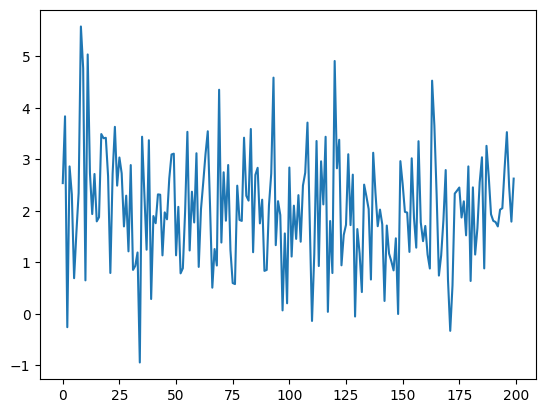

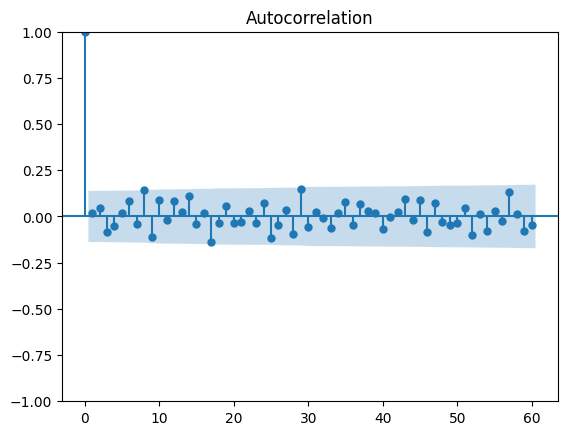

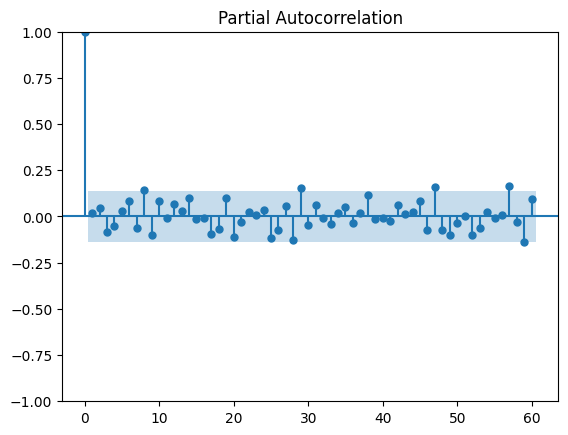

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv('Tema1Sim.csv', sep = ";", decimal = ",")
series1 = data.iloc[:200,0]
series2 = data.iloc[:200,1]
series3 = data.iloc[:200,2]
series4 = data.iloc[:200,3]
series5 = data.iloc[:200,4]
series6 = data.iloc[:2000,5]

y = series1 # CHANGE THE SERIES HERE

num_lags=60 # to discuss

plt.plot(y)
plt.show()
plot_acf(y,lags=num_lags)
plt.show()
plot_pacf(y,lags=num_lags,method="ols")
plt.show()


In [2]:
from scipy.stats import kurtosis, skew

# Basic statistics
mean = np.mean(y)
std = np.std(y)
kurtosis = kurtosis(y)
skewness = skew(y)

print("Mean",mean,"Standard deviation",std,"Skewness", skewness, "Kurtosis",kurtosis)

# t-test for the mean with Ho equal to zero

t_statistic, p_value = stats.ttest_1samp(y, 0)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")


Mean -0.0002930000000000019 Standard deviation 0.7478108511856453 Skewness -0.05723596485846721 Kurtosis 0.5475939107515222
T-statistic: -0.017517908543596864
P-value: 0.9860251942779497


In [3]:
#from pmdarima.arima.utils import ndiffs, nsdiffs
import statsmodels as sm

# Ho: the process is not stationary. We need, at least, a unit root
# H1: the process is stationary. We have to check different models (lags)


adf_test = sm.tsa.stattools.adfuller(y,maxlag=10) 
# print("adf_test", adf_test) # first output "The test statistic", second output "p-value"
print("ADF test for the original series")
print("Statistic Value:" , adf_test[0])
print("p-value:" , adf_test[1])
# print(sm.__version__)

ADF test for the original series
Statistic Value: -46.14654382864258
p-value: 0.0


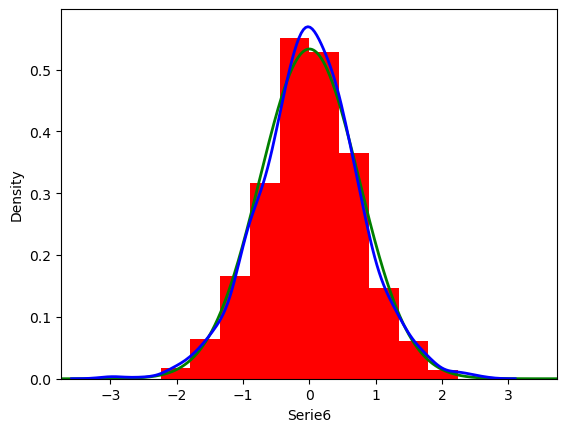

In [4]:
import seaborn as sns
import scipy.stats as st

mu = np.mean(y)
sigma = np.std(y)
x = np.linspace(mu -5*sigma, mu +5*sigma, 1000)
pdf = st.norm.pdf(x, mu, sigma)
ax = plt.plot(x, pdf, lw = 2, color = "g")
ax = plt.hist(y,density=True, range = (mean - 3*std, mean + 3*std), color = "r")
ax = sns.distplot(y, hist = False, kde = True,
                 kde_kws = {'linewidth': 2}, color = "blue")
ax.set_xlim(mean - 5*std, mean + 5*std)

plt.show()




In [5]:
from scipy.stats import shapiro
# Normality test
saphiro = shapiro(y)

print("Saphiro",saphiro) # first output "The test statistic", second output "p-value"

import statsmodels.api as sm
print("")
print("Box test")
box_test = sm.stats.acorr_ljungbox(y, lags=[25])
box_test


Saphiro ShapiroResult(statistic=0.9968049945060752, pvalue=0.0003510877444879887)

Box test


,lb_stat,lb_pvalue
25,32.431944,0.14589


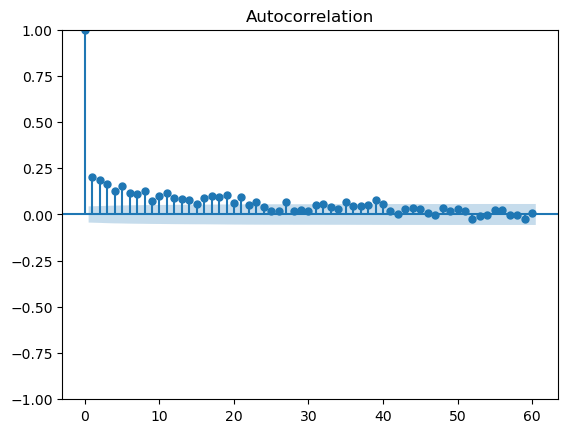

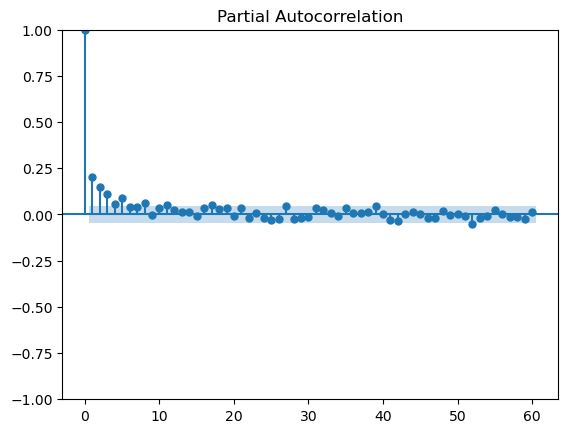

In [6]:
# plt.plot(y**2)
# plt.show()
plot_acf(y**2,lags=num_lags)
plt.show()
plot_pacf(y**2,lags=num_lags,method="ols")
plt.show()

In [7]:
box_test2 = sm.stats.acorr_ljungbox(y**2, lags=[20])
print("Ljung-Box for the squares") 
box_test2


Ljung-Box for the squares


,lb_stat,lb_pvalue
20,558.716375,1.400036e-105


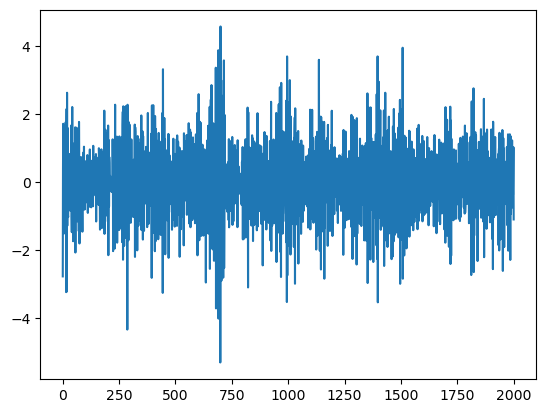

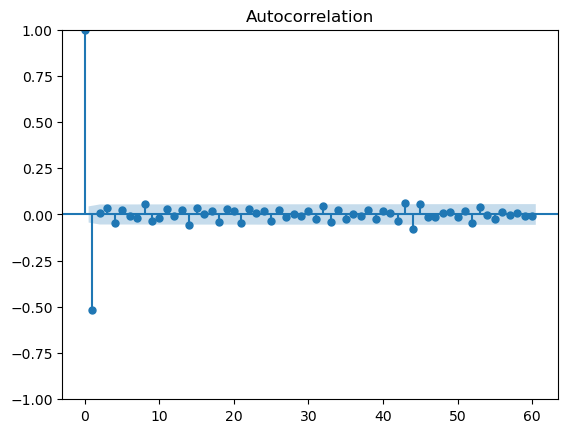

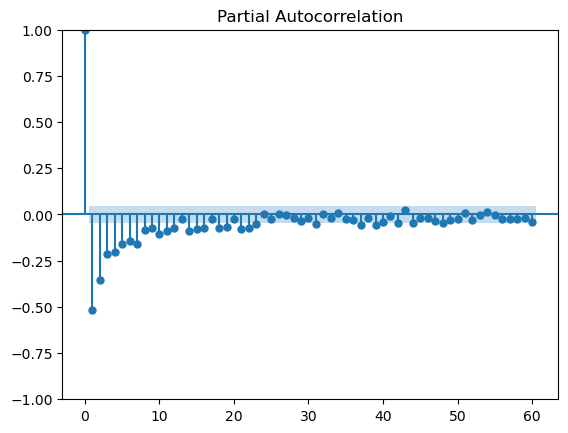

In [8]:
# In case we have to take some differences to the original series
z = y.diff().dropna()
# zz = y.diff(1).diff(1).dropna() # in case we need two differences
plt.plot(z)
plt.show()
plot_acf(z,lags=num_lags)
plt.show()
plot_pacf(z,lags=num_lags)
plt.show()

In [9]:
box_test_1 = sm.stats.acorr_ljungbox(z, lags=[20])
print("Ljung-Box for z") 
print(box_test_1)
box_test_2 = sm.stats.acorr_ljungbox(z**2, lags=[20])
print("Ljung-Box for z**2") 
print(box_test_2)

Ljung-Box for z
       lb_stat      lb_pvalue
20  570.794398  4.043160e-108
Ljung-Box for z**2
        lb_stat      lb_pvalue
20  1243.492068  3.700024e-251


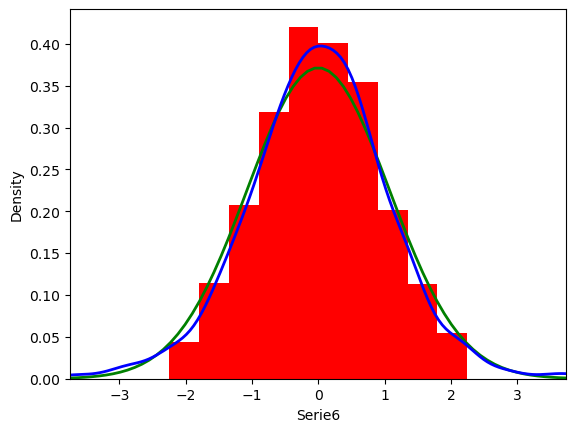

Saphiro ShapiroResult(statistic=0.9905429878391003, pvalue=3.926442184932629e-10)


In [10]:
mu = np.mean(z)
sigma = np.std(z)
x = np.linspace(mu -5*sigma, mu +5*sigma, 100)
pdf = st.norm.pdf(x, mu, sigma)
ax = plt.plot(x, pdf, lw = 2, color = "g")
ax = plt.hist(z,density=True, range = (mean - 3*std, mean + 3*std), color = "r")
ax = sns.distplot(z, hist = False, kde = True,
                 kde_kws = {'linewidth': 2}, color = "blue")
ax.set_xlim(mean - 5*std, mean + 5*std)

plt.show()
from scipy.stats import shapiro
# Normality test
saphiro = shapiro(z)

print("Saphiro",saphiro) # first output "The test statistic", second output "p-value"

# Analyzing the real time series

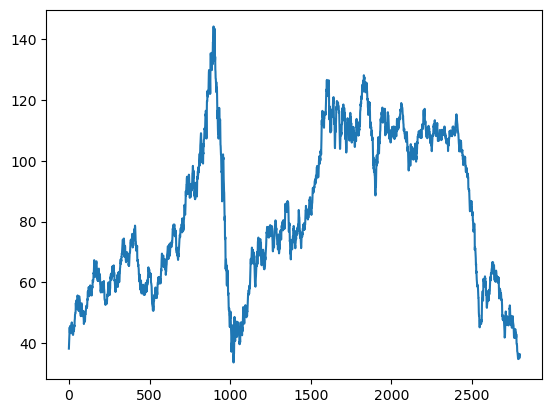

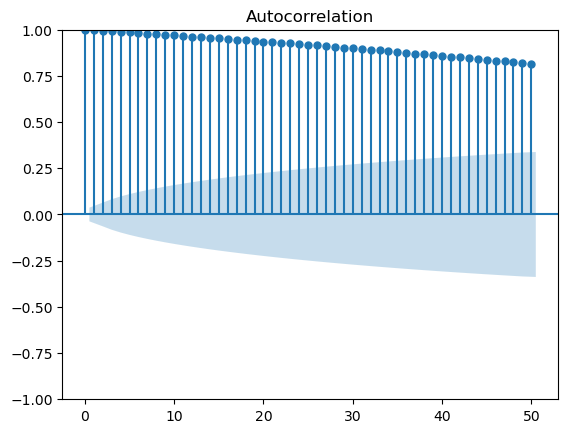

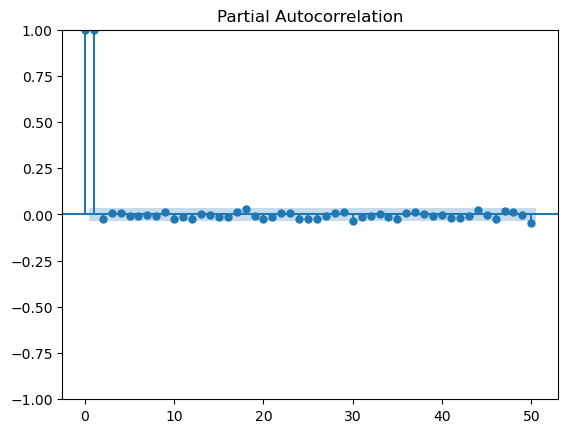

ADF test for the original series
Statistic Value: -1.5924721321980406
p-value: 0.4873739076368575


In [3]:
data = pd.read_csv("Tema1Real.csv", sep = ";", decimal = ",")
# data = pd.read_csv("Individual_Homework.csv", sep = ";", decimal = ",")

spot = data.iloc[:,0]
y = spot

num_lags=50

plt.plot(y)
plt.show()
plot_acf(y,lags=num_lags)
plt.show()
plot_pacf(y,lags=num_lags)
plt.show()

#from pmdarima.arima.utils import ndiffs, nsdiffs
import statsmodels as sm

# Ho: the process is not stationary. We need, at least, a unit root
# H1: the process is stationary. We have to check different models (lags)


adf_test = sm.tsa.stattools.adfuller(y,maxlag=10) 
# print("adf_test", adf_test) # first output "The test statistic", second output "p-value"
print("ADF test for the original series")
print("Statistic Value:" , adf_test[0])
print("p-value:" , adf_test[1])
# print(sm.__version__)

In [12]:
from scipy.stats import kurtosis, skew

# Basic statistics
mean = np.mean(y)
std = np.std(y)
kurtosis = kurtosis(y)
skewness = skew(y)

print("Mean",mean,"Standard deviation",std,"Skewness", skewness, "Kurtosis",kurtosis)


Mean 82.88516446192348 Standard deviation 25.30023024440408 Skewness 0.07624147173708391 Kurtosis -1.2732520490137378


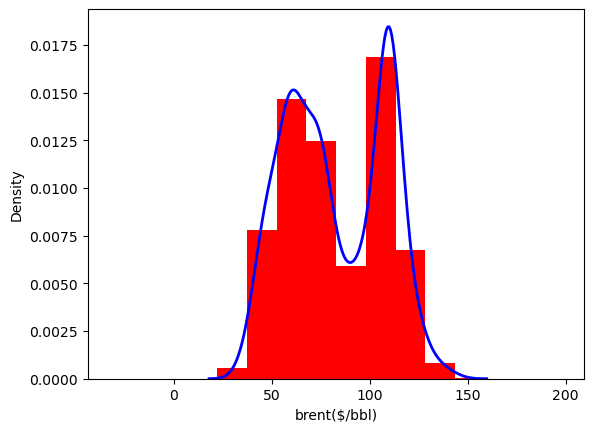

Saphiro ShapiroResult(statistic=0.9431541124104807, pvalue=1.5609758359056756e-31)
mean 82.88516446192348 std 25.30023024440408


In [13]:
saphiro = shapiro(y)
mean = np.mean(y)
std = np.std(y)
mu = np.mean(y)
sigma = np.std(y)

ax = plt.hist(y,density=True, range = (mean - 3*std, mean + 3*std), color = "r")
ax = sns.distplot(y, hist = False, kde = True,
                 kde_kws = {'linewidth': 2}, color = "blue")
ax.set_xlim(mean - 5*std, mean + 5*std)

plt.show()
print("Saphiro",saphiro)
print("mean",mean,"std",std)

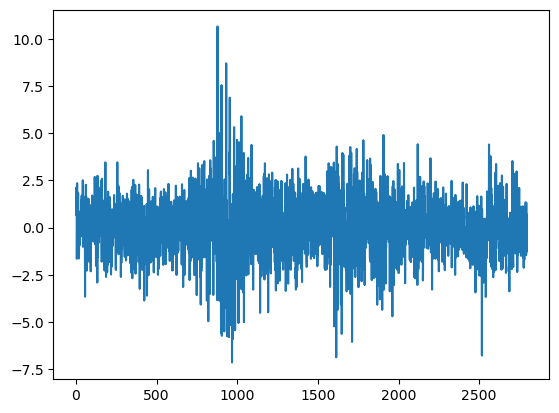

In [14]:
#returns = np.log(spot).diff().dropna() # we take log first and then one differente, diff(log(spot))
#z = returns
z = y.diff().dropna()

plt.plot(z)

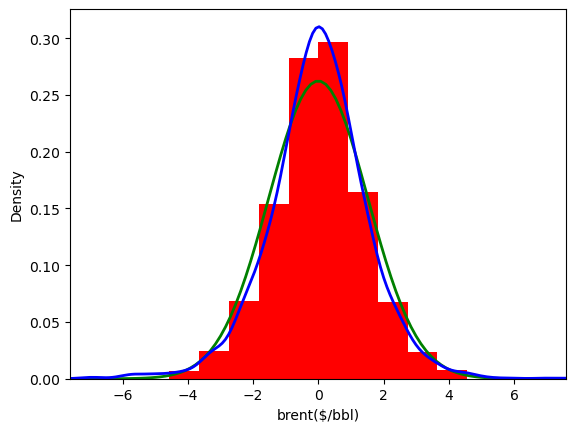

In [15]:
mean = np.mean(z)
std = np.std(z)
mu = np.mean(z)
sigma = np.std(z)
x = np.linspace(mu -5*sigma, mu +5*sigma, 100)
pdf = st.norm.pdf(x, mu, sigma)
ax = plt.plot(x, pdf, lw = 2, color = "g")
ax = plt.hist(z,density=True, range = (mean - 3*std, mean + 3*std), color = "r")
ax = sns.distplot(z, hist = False, kde = True,
                 kde_kws = {'linewidth': 2}, color = "blue")
ax.set_xlim(mean - 5*std, mean + 5*std)

plt.show()

In [16]:
from scipy.stats import kurtosis, skew

# Basic statistics
mean = np.mean(z)
std = np.std(z)
kurtosis = kurtosis(z)
skewness = skew(z)

print("Mean",mean,"Standard deviation",std,"Skewness", skewness, "Kurtosis",kurtosis)


Mean -0.0006795422031473529 Standard deviation 1.5203439274317998 Skewness -0.02160386419522025 Kurtosis 2.7345049419526504


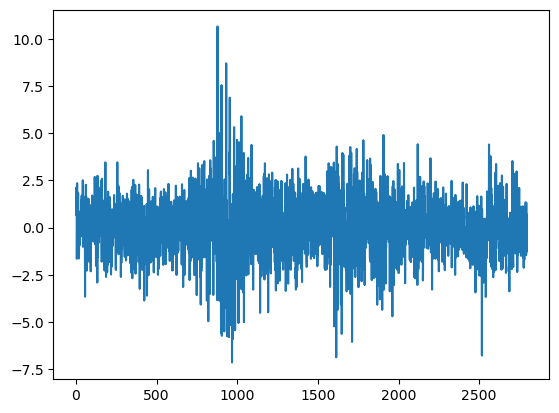

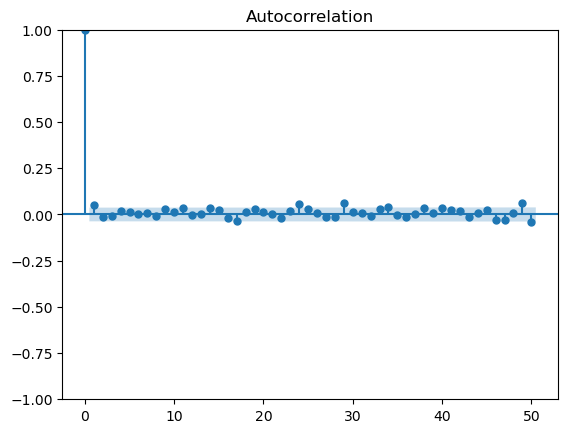

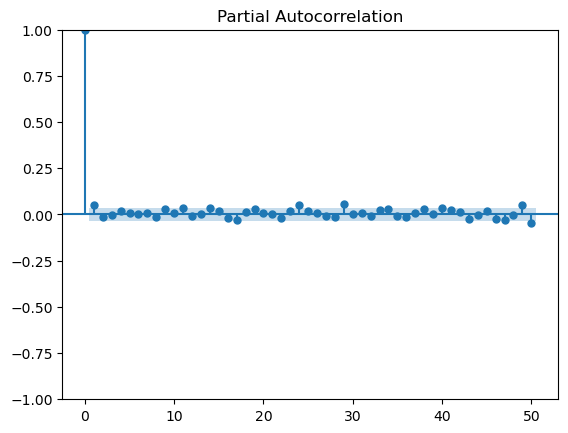

In [17]:
plt.plot(z)
plt.show()
plot_acf(z,lags=num_lags)
plt.show()
plot_pacf(z,lags=num_lags)
plt.show()

In [18]:
from scipy.stats import shapiro
# Normality test
saphiro = shapiro(z)

print("Saphiro",saphiro) # first output "The test statistic", second output "p-value"

import statsmodels.api as sm
box_test = sm.stats.acorr_ljungbox(z, lags=[50])
print("Ljung-Box for z") 
print(box_test)


Saphiro ShapiroResult(statistic=0.97638624998972, pvalue=3.9415758790983345e-21)
Ljung-Box for z
      lb_stat  lb_pvalue
50  98.436748   0.000052


In [19]:
import statsmodels.api as sm
box_test2 = sm.stats.acorr_ljungbox(z**2, lags=[20])
print("Ljung-Box for z**2") 
print(box_test2)

Ljung-Box for z**2
       lb_stat      lb_pvalue
20  622.759486  4.592415e-119


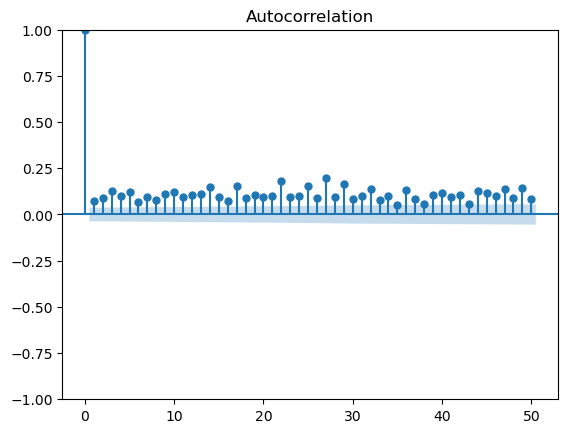

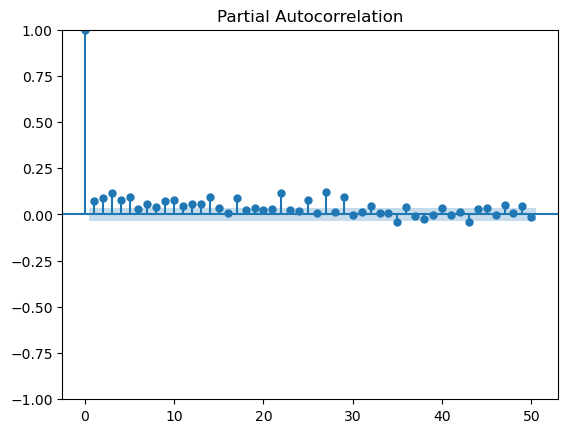

In [20]:
# plt.plot(z**2)
# plt.show()
plot_acf(z**2,lags=num_lags)
plt.show()
plot_pacf(z**2,lags=num_lags)
plt.show()